## *Importing Libraries*

### In this project, we will work with data using Python. The following libraries are essential for data manipulation, numerical operations, and visualization:

In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Environmental Metrics Analysis: Insights from Time-Series Data
Climate and environmental monitoring are crucial for understanding long-term trends, predicting potential risks, and making informed decisions across various sectors. This project presents a comprehensive analysis of environmental data, examining the intricate relationships between temperature, humidity, and heat index over time.

By leveraging advanced data analysis techniques in Python, we aim to:

*1.Explore the temporal dynamics of environmental measurements.*

*2.Identify patterns, trends, and potential anomalies in the dataset.*

*3.Provide insights into how different environmental metrics interact and fluctuate.*

In [83]:
# Load the datasets
temperature_path = '/mnt/data/Temperature.csv'
humidity_path = '/mnt/data/Humidity.csv'
heat_index_path = '/mnt/data/Heat_index.csv'


In [ ]:
# Read the data into pandas DataFrames
temperature_data = pd.read_csv(r"C:\Users\hatak\Downloads\Temperature.csv")
humidity_data = pd.read_csv(r"C:\Users\hatak\Downloads\Humidity.csv")
heat_index_data = pd.read_csv(r"C:\Users\hatak\Downloads\Heat_index.csv")

print(temperature_data.head())

   Unnamed: 0  result  table                _start                 _stop  \
0         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
1         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
2         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
3         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
4         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   

                  _time     _value       _field _measurement  
0  2022-04-13T21:38:00Z  26.800000  Temperature    Sensor_01  
1  2022-04-13T21:39:00Z  26.800000  Temperature    Sensor_01  
2  2022-04-13T21:40:00Z  26.800000  Temperature    Sensor_01  
3  2022-04-13T21:41:00Z  26.850000  Temperature    Sensor_01  
4  2022-04-13T21:42:00Z  26.883333  Temperature    Sensor_01  


In [85]:
print(humidity_data.head())

   Unnamed: 0  result  table                _start                 _stop  \
0         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
1         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
2         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
3         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
4         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   

                  _time     _value    _field _measurement  
0  2022-04-13T21:38:00Z  32.400000  Humidity    Sensor_01  
1  2022-04-13T21:39:00Z  32.433333  Humidity    Sensor_01  
2  2022-04-13T21:40:00Z  32.100000  Humidity    Sensor_01  
3  2022-04-13T21:41:00Z  31.916667  Humidity    Sensor_01  
4  2022-04-13T21:42:00Z  31.716667  Humidity    Sensor_01  


In [86]:
print(heat_index_data.head())

   Unnamed: 0  result  table                _start                 _stop  \
0         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
1         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
2         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
3         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   
4         NaN     NaN      0  2022-04-12T05:00:00Z  2023-01-20T06:00:00Z   

                  _time     _value      _field _measurement  
0  2022-04-13T21:38:00Z  26.389790  Heat_index    Sensor_01  
1  2022-04-13T21:39:00Z  26.391128  Heat_index    Sensor_01  
2  2022-04-13T21:40:00Z  26.377855  Heat_index    Sensor_01  
3  2022-04-13T21:41:00Z  26.401618  Heat_index    Sensor_01  
4  2022-04-13T21:42:00Z  26.414282  Heat_index    Sensor_01  


### This step simplifies the datasets, making them easier to work with and merge later in the analysis. It standardizes the column names across different types of measurements, creating a clean, uniform structure for further data processing and visualization.

*1. For tempaerature_data :*
    *the columns "_time" and "_value" is renamed to "Time"and  "Temperature" respectively.*

*2. For humiditty_data :*
     *the columns "_time" and "_value" is renamed to "Time" and "Humidity" respectively.*

*3. For heat_index_data :*
     *the columns "_time" and "_value" is renamed to "Time" nad "Heat Index" respectively*

In [ ]:
# Renaming the columns 
temperature_data = temperature_data[['_time', '_value']].rename(columns={'_time': 'Time', '_value': 'Temperature'})
humidity_data = humidity_data[['_time', '_value']].rename(columns={'_time': 'Time', '_value': 'Humidity'})
heat_index_data = heat_index_data[['_time', '_value']].rename(columns={'_time': 'Time', '_value': 'Heat Index'})


## Here the string timestamps are converted into datetime objects. 

In [88]:
# Convert Time column to datetime format for consistency
temperature_data['Time'] = pd.to_datetime(temperature_data['Time'])
humidity_data['Time'] = pd.to_datetime(humidity_data['Time'])
heat_index_data['Time'] = pd.to_datetime(heat_index_data['Time'])

### Here the three datasets (temperature_data, humidity_data, and heat_index_data) are merged  based on the common column Time:

First Merge: Combines temperature_data and humidity_data on the Time column.

Second Merge: Merges the result with heat_index_data, again using the Time column.


*The reuslt is a single dataframe  (merged_data)  with all the data merged together.*

In [89]:
# Merge the datasets on Time
merged_data = pd.merge(temperature_data, humidity_data, on='Time')
merged_data = pd.merge(merged_data, heat_index_data, on='Time')

In [90]:
merged_data

,Time,Temperature,Humidity,Heat Index
0,2022-04-13 21:38:00+00:00,26.800000,32.400000,26.389790
1,2022-04-13 21:39:00+00:00,26.800000,32.433333,26.391128
2,2022-04-13 21:40:00+00:00,26.800000,32.100000,26.377855
3,2022-04-13 21:41:00+00:00,26.850000,31.916667,26.401618
4,2022-04-13 21:42:00+00:00,26.883333,31.716667,26.414282
...,...,...,...,...
385867,2023-01-20 01:12:00+00:00,21.000000,46.133333,20.359950
385868,2023-01-20 01:13:00+00:00,21.000000,46.100000,20.359080
385869,2023-01-20 01:14:00+00:00,21.000000,46.266667,20.363430
385870,2023-01-20 01:15:00+00:00,21.000000,46.033333,20.357340


## Here we can see there are no null values in the dataframe.

In [91]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385872 entries, 0 to 385871
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   Time         385872 non-null  datetime64[ns, UTC]
 1   Temperature  385872 non-null  float64            
 2   Humidity     385872 non-null  float64            
 3   Heat Index   385872 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 11.8 MB


# Basic Stats of the data 

In [92]:
# Display basic statistics
print("Basic Statistics of the Merged Data:")
print(merged_data.describe())


Basic Statistics of the Merged Data:
         Temperature       Humidity     Heat Index
count  385872.000000  385872.000000  385872.000000
mean       23.350587      52.172995      23.096529
std         2.558366      11.013673       2.657446
min        16.400000      17.983333      15.753450
25%        21.733333      45.350000      21.541057
50%        23.366667      53.183333      23.203913
75%        25.200000      59.200000      25.036140
max        29.933333      96.300000      30.089642


## Here, we’ve plotted three key variables: Temperature, Humidity, and Heat Index, all graphed against Time.
*1.The Temperature line shows how the heat changes over the time period.*

*2.The Humidity line tracks the moisture levels in the air.*

*3.The Heat Index combines both to indicate how hot it feels.*

- A rise in Temperature might lead to an increase in the Heat Index.
- Changes in Humidity can also impact the Heat Index, showing how comfortable or uncomfortable the conditions are.

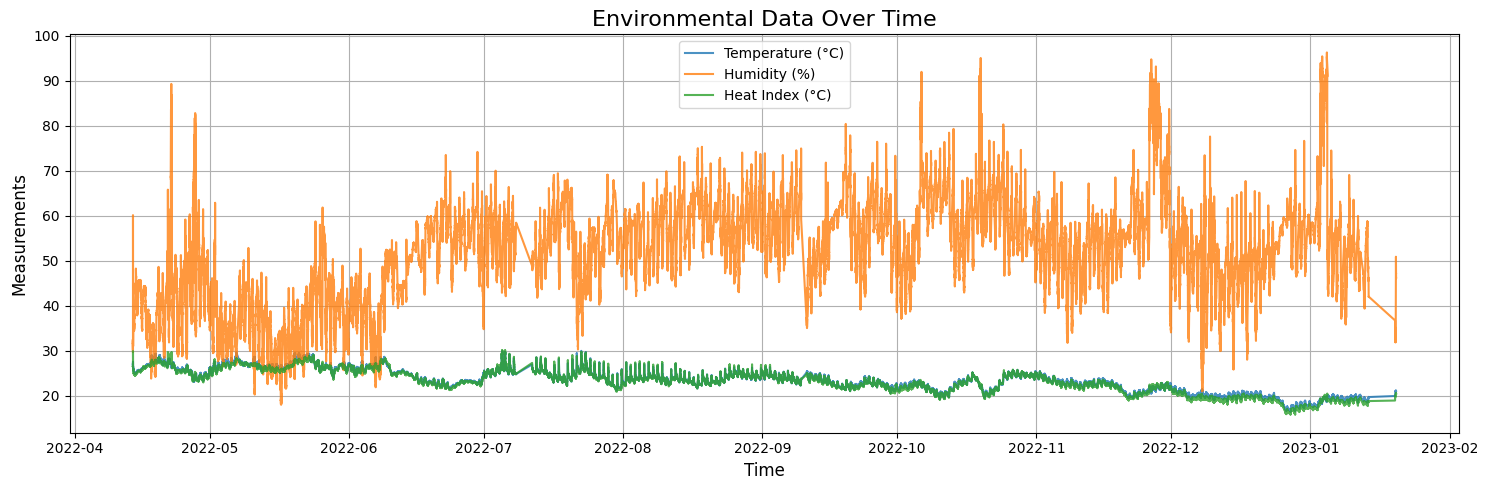

In [112]:
# Plot time-series data
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Time'], merged_data['Temperature'], label='Temperature (°C)', alpha=0.8)
plt.plot(merged_data['Time'], merged_data['Humidity'], label='Humidity (%)', alpha=0.8)
plt.plot(merged_data['Time'], merged_data['Heat Index'], label='Heat Index (°C)', alpha=0.8)
plt.title('Environmental Data Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Measurements', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

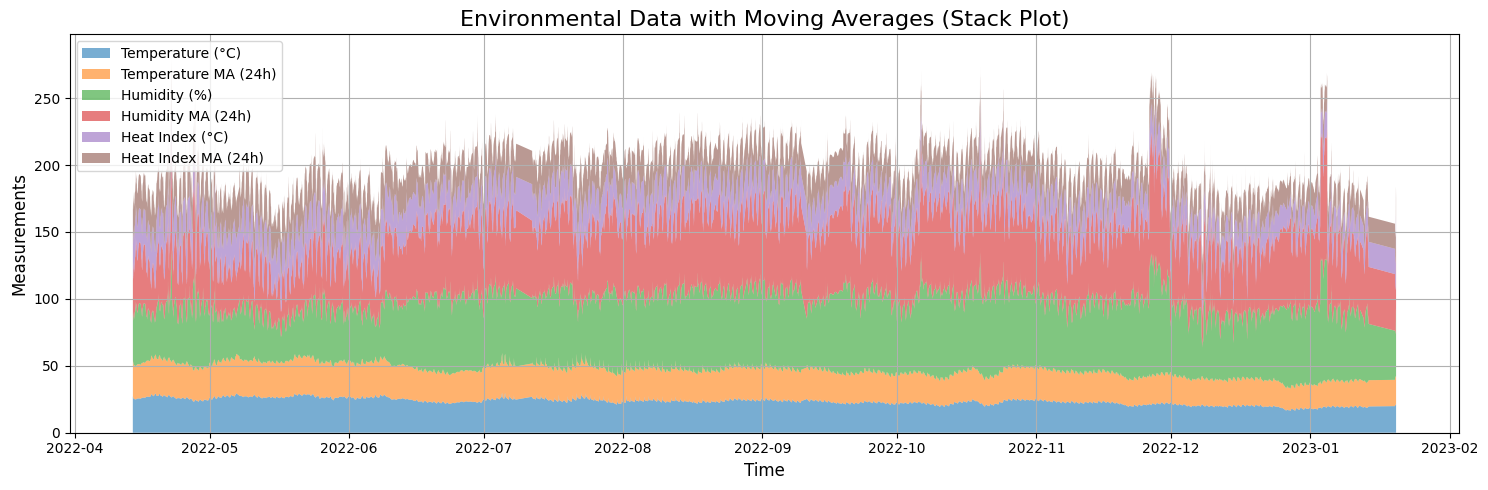

In [106]:
def calculate_moving_average(data, column, window_size):
    data[f'{column} MA ({window_size})'] = data[column].rolling(window=window_size).mean()
    return data

# Add moving averages to the dataset
merged_data = calculate_moving_average(merged_data, 'Temperature', 24)
merged_data = calculate_moving_average(merged_data, 'Humidity', 24)
merged_data = calculate_moving_average(merged_data, 'Heat Index', 24)

# Prepare data for stack plot
time = merged_data['Time']
temperature = merged_data['Temperature']
temperature_ma = merged_data['Temperature MA (24)']
humidity = merged_data['Humidity']
humidity_ma = merged_data['Humidity MA (24)']
heat_index = merged_data['Heat Index']
heat_index_ma = merged_data['Heat Index MA (24)']

# Create stack plot
plt.figure(figsize=(15, 5))
plt.stackplot(
    time,
    temperature, temperature_ma, humidity, humidity_ma, heat_index, heat_index_ma,
    labels=[
        'Temperature (°C)',
        'Temperature MA (24h)',
        'Humidity (%)',
        'Humidity MA (24h)',
        'Heat Index (°C)',
        'Heat Index MA (24h)'
    ],
    alpha=0.6
)
plt.title('Environmental Data with Moving Averages (Stack Plot)', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Measurements', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Here the relationship between Temperature, Humidity, and Heat Index is represented using a correlation matrix.

- Temperature and Heat Index: Strong positive correlation (0.99) – Heat Index increases with Temperature.

- Humidity and Temperature: Moderate negative correlation (-0.53) – Higher humidity tends to lower Temperature.

- Humidity and Heat Index: Weak negative correlation (-0.44) – Humidity has a less significant impact on Heat Index.


Correlation Matrix:
             Temperature  Humidity  Heat Index
Temperature     1.000000 -0.527634    0.993440
Humidity       -0.527634  1.000000   -0.436579
Heat Index      0.993440 -0.436579    1.000000


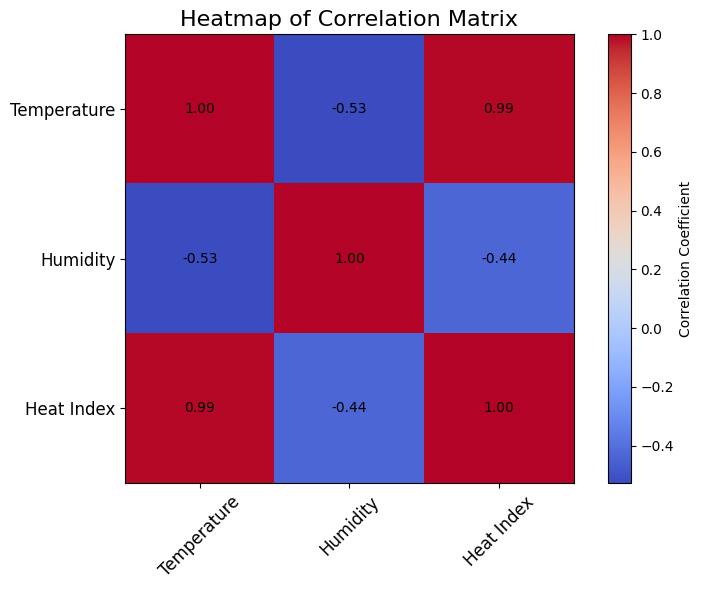

In [ ]:
# # Correlation matrix
# correlation_matrix = merged_data[['Temperature', 'Humidity', 'Heat Index']].corr()
# print("\nCorrelation Matrix:")
# print(correlation_matrix)


# Calculate the correlation matrix
correlation_matrix = merged_data[['Temperature', 'Humidity', 'Heat Index']].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap 1.Red - For strong +ve corelation 
#         2.Blue - For strong -ve corelation
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')

# Add axis labels
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=45, fontsize=12)
plt.yticks(ticks=np.arange(len(correlation_matrix.columns)), labels=correlation_matrix.columns, fontsize=12)
plt.title('Heatmap of Correlation Matrix', fontsize=16)

# Annotate cells with correlation values
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f'{value:.2f}', ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


### Here the stack plot visualizes the combined variations in Temperature, Humidity, and Heat Index.

- Temperature (Blue): Forms the base layer, showing steady variations.

- Humidity (Orange): Consistently higher values stacked over temperature.

- Heat Index (Green): Adds dynamic peaks, indicating combined effects of temperature and humidity.



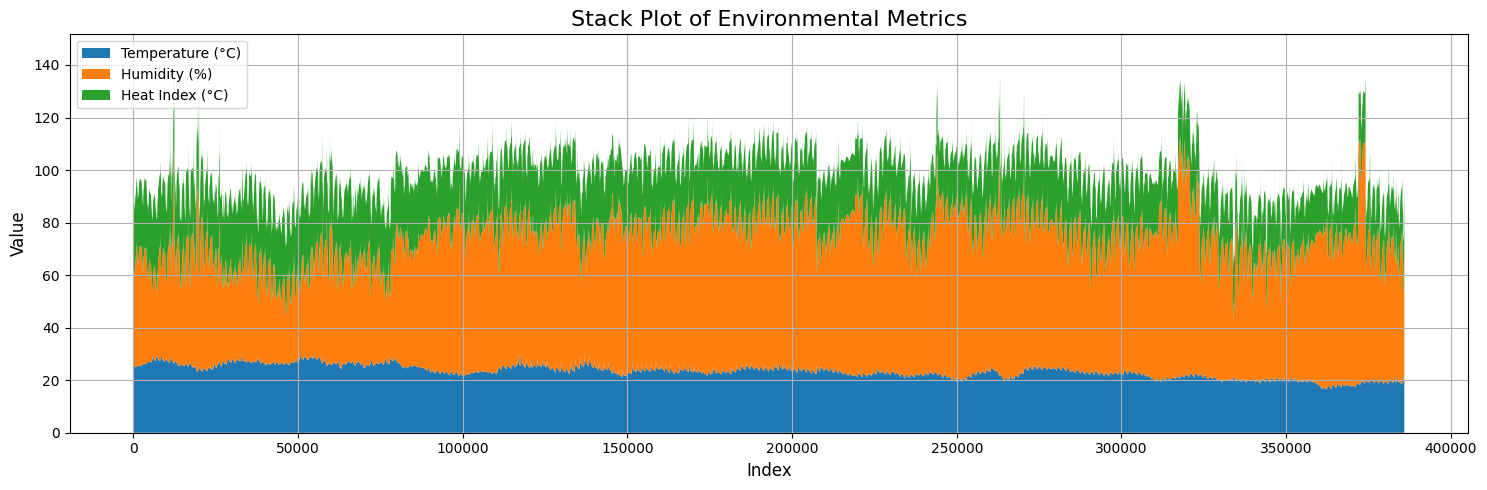

In [ ]:

plt.figure(figsize=(15, 5))

# Creating the stack plot
plt.stackplot(
    range(len(merged_data)),  # Sequential index
    merged_data['Temperature'], 
    merged_data['Humidity'], 
    merged_data['Heat Index'], 
    labels=['Temperature (°C)', 'Humidity (%)', 'Heat Index (°C)']
)

# Adding labels and other details
plt.title('Stack Plot of Environmental Metrics', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### The line plot visualises the seasonal trends in Temperature, Humidity, and Heat Index over a year.

- Temperature and Heat Index (blue and green): Exhibit relatively consistent trends, peaking slightly during warmer months.

- Humidity (orange): Shows a distinct drop around mid-year, with higher levels at the start and end of the year.


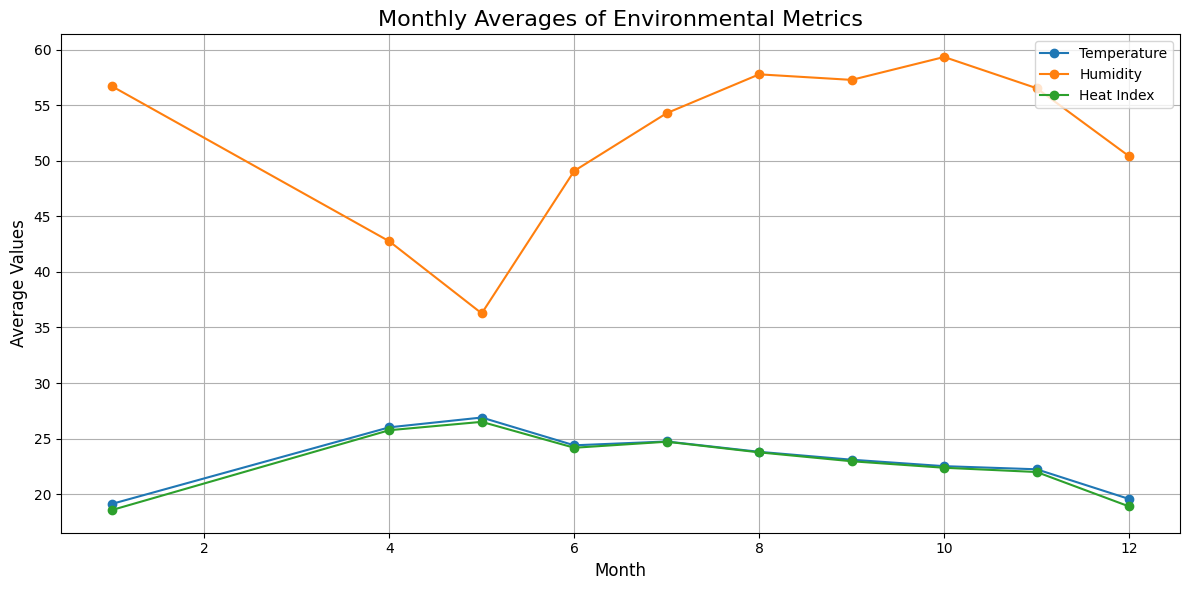

In [118]:
# Seasonal Trends - Line Plot
merged_data['Month'] = merged_data['Time'].dt.month
monthly_avg = merged_data.groupby('Month')[['Temperature', 'Humidity', 'Heat Index']].mean()

# Plot seasonal trends
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Averages of Environmental Metrics', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

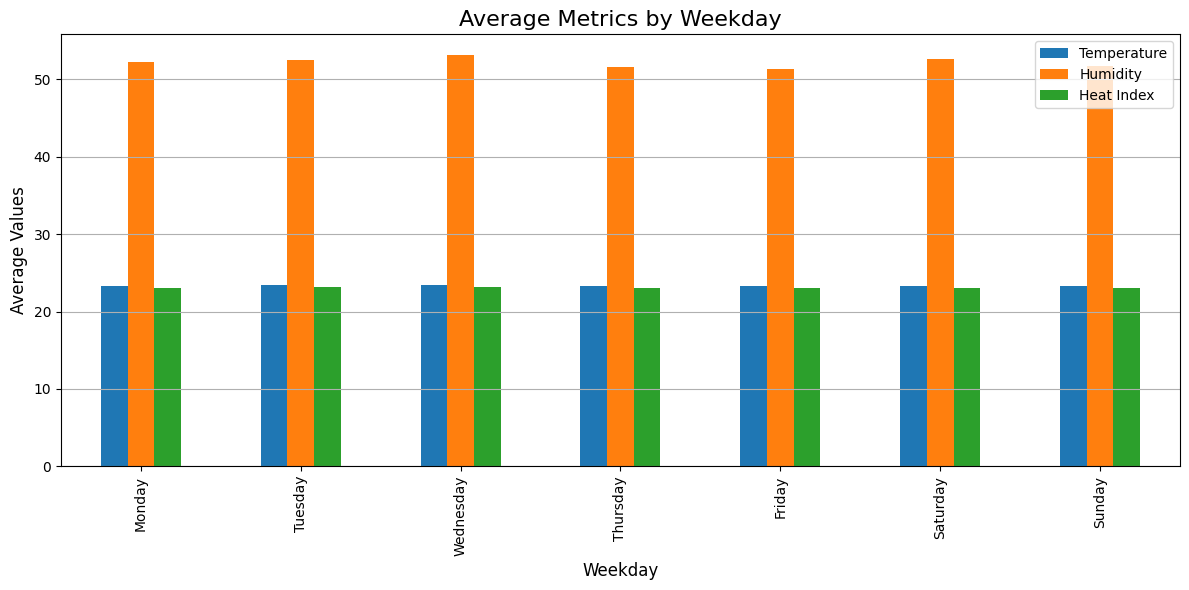

In [123]:
# Weekday Analysis
merged_data['Weekday'] = merged_data['Time'].dt.day_name()
weekday_avg = merged_data.groupby('Weekday')[['Temperature', 'Humidity', 'Heat Index']].mean()

# Plot weekday trends
plt.figure(figsize=(12, 6))
weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
weekday_avg.plot(kind='bar', ax=plt.gca())
plt.title('Average Metrics by Weekday', fontsize=16)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# # Weekday Analysis
# merged_data['Weekday'] = merged_data['Time'].dt.day_name()
# weekday_avg = merged_data.groupby('Weekday')[['Temperature', 'Humidity', 'Heat Index']].mean()

# # Reorder the days of the week for consistent display
# weekday_avg = weekday_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# # Plot weekday trends as a line plot
# plt.figure(figsize=(12, 6))
# weekday_avg.plot(kind='line', marker='o', ax=plt.gca())
# plt.title('Average Metrics by Weekday', fontsize=16)
# plt.xlabel('Weekday', fontsize=12)
# plt.ylabel('Average Values', fontsize=12)
# plt.grid(True)
# plt.legend(loc='upper right')
# plt.tight_layout()
# plt.show()

### This line plot effectively visualizes the hourly trends of environmental metrics.
- Humidity (orange): Peaks around midday and declines later in the day.

- Temperature and Heat Index (blue and green): Remain relatively stable throughout the day.

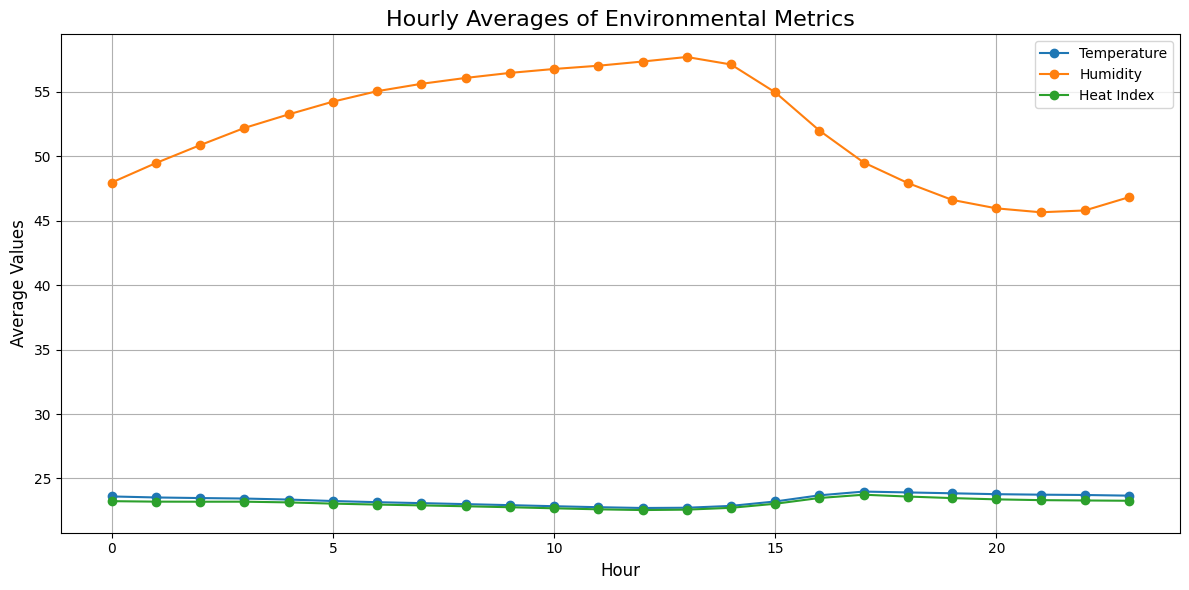

In [15]:
# Hourly Trends
merged_data['Hour'] = merged_data['Time'].dt.hour
hourly_avg = merged_data.groupby('Hour')[['Temperature', 'Humidity', 'Heat Index']].mean()

# Plot hourly trends
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Hourly Averages of Environmental Metrics', fontsize=16)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Average Values', fontsize=12)
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


Number of temperature anomalies: 0


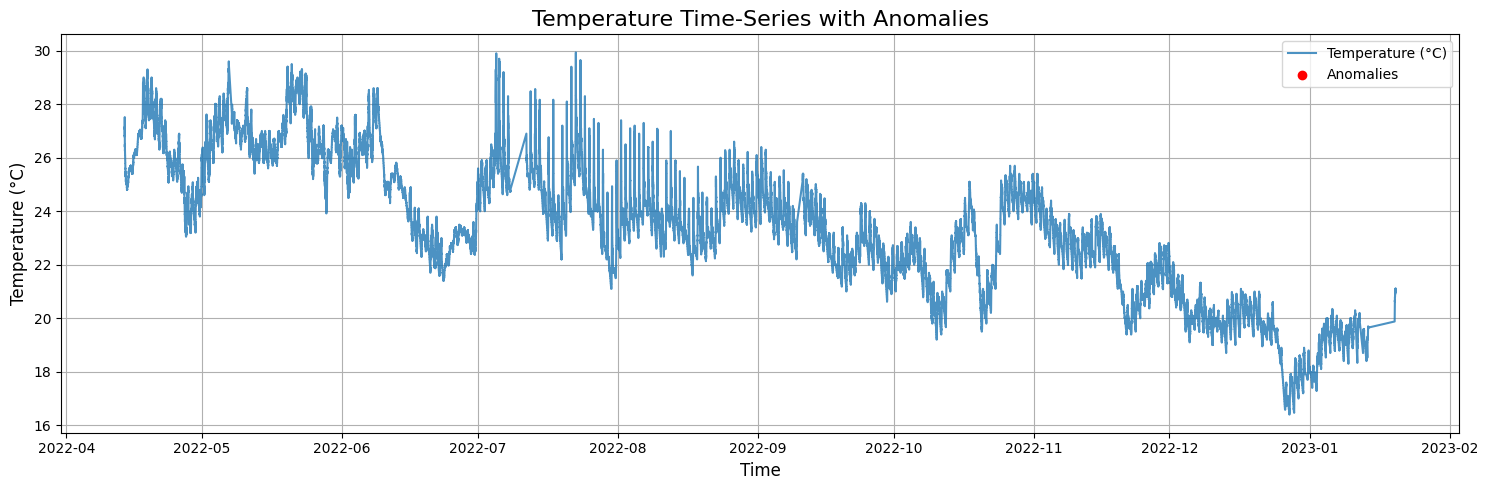

In [127]:
# Anomaly Detection
threshold_temp = merged_data['Temperature'].mean() + 3 * merged_data['Temperature'].std()
anomalies = merged_data[merged_data['Temperature'] > threshold_temp]
print(f"Number of temperature anomalies: {len(anomalies)}")

# Highlight anomalies on line plot
plt.figure(figsize=(15, 5))
plt.plot(merged_data['Time'], merged_data['Temperature'], label='Temperature (°C)', alpha=0.8)
plt.scatter(anomalies['Time'], anomalies['Temperature'], color='red', label='Anomalies', zorder=5)
plt.title('Temperature Time-Series with Anomalies', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Temperature (°C)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# # Outlier Detection using IQR
# Q1 = merged_data[['Temperature', 'Humidity', 'Heat Index']].quantile(0.25)
# Q3 = merged_data[['Temperature', 'Humidity', 'Heat Index']].quantile(0.75)
# IQR = Q3 - Q1
# outliers = ((merged_data < (Q1 - 1.5 * IQR)) | (merged_data > (Q3 + 1.5 * IQR))).any(axis=1)
# outlier_data = merged_data[outliers]
# print(f"Number of data points with outliers: {outlier_data.shape[0]}")

# Outlier Detection using IQR
Q1 = merged_data[['Temperature', 'Humidity', 'Heat Index']].quantile(0.25)
Q3 = merged_data[['Temperature', 'Humidity', 'Heat Index']].quantile(0.75)
IQR = Q3 - Q1

# Align the DataFrame to quantiles for comparison
outliers = ((merged_data[['Temperature', 'Humidity', 'Heat Index']] < (Q1 - 1.5 * IQR)) | 
            (merged_data[['Temperature', 'Humidity', 'Heat Index']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Filter out the rows with outliers
outlier_data = merged_data[outliers]

print(f"Number of data points with outliers: {outlier_data.shape[0]}")


Number of data points with outliers: 9092


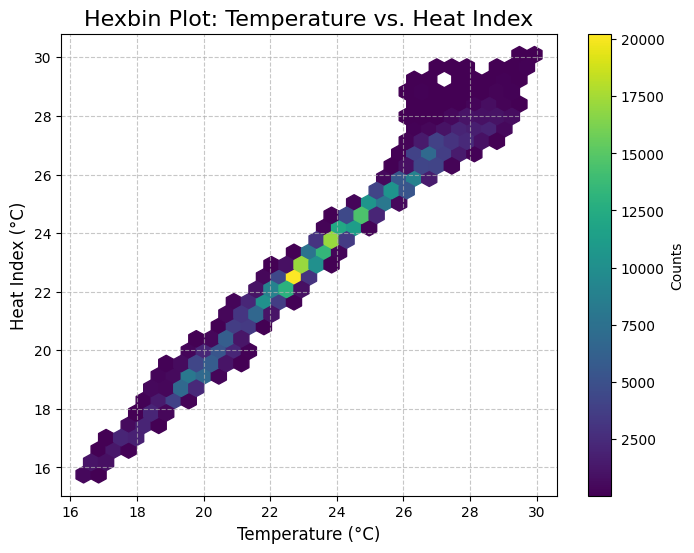

In [130]:
#Scatter Plot: Temperature vs. Heat Index with Bins
plt.figure(figsize=(8, 6))
plt.hexbin(
    merged_data['Temperature'], 
    merged_data['Heat Index'], 
    gridsize=30,  # Adjust bin size
    cmap='viridis', 
    mincnt=1
)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot: Temperature vs. Heat Index', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Heat Index (°C)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
 

### Conclusion

*This analysis examines environmental metrics—Temperature, Humidity, and Heat Index—over time, revealing critical patterns and relationships. Seasonal and hourly trends indicate natural variability, with moving averages smoothing short-term fluctuations. High correlations between metrics suggest interdependence, while outlier detection highlights anomalous conditions, valuable for climate monitoring. Monthly averages and weekday trends provide insights into temporal variations. Anomalies in temperature and other metrics underline the importance of continuous monitoring for extreme conditions. These findings enable better understanding of environmental dynamics, aiding in predictive modeling, policy formulation, and climate resilience strategies.*


